### Customer segmentation using k-Nearest Neighbor (kNN)

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Dataset

In [3]:
df = pd.read_csv('dataset/Mall_Customers.csv')

In [4]:
df.head(n=10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [5]:
df.shape

(200, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


#### Checking for missing values

In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

#### Select features to be used in the dataset

In [11]:
X = df.iloc[:,[3, 4]].values

#### Choosing the no. of clusters in the dataset

**WCSS** - **W**ithin **C**lusters **S**um of **S**quares

In [16]:
# finding WCSS value for different number of clusters

WCSS = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', n_init='auto', random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)  # give wcss value for each cluster

### Data visualization

In [ ]:
# plot an elbow graph

# sns.set()
# plt.plot(range(1, 11), WCSS)
# plt.title('The elbow point graph')
# plt.xlabel('Number of clusters')
# plt.ylabel('WCSS')
# plt.show()

### Train kNN model

In [18]:
kmeans = KMeans(n_clusters=5, init='k-means++', n_init='auto', random_state=0)

# label for each data point based on their cluster
y = kmeans.fit_predict(X)

print(y)

[3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


#### Visualize the clusters

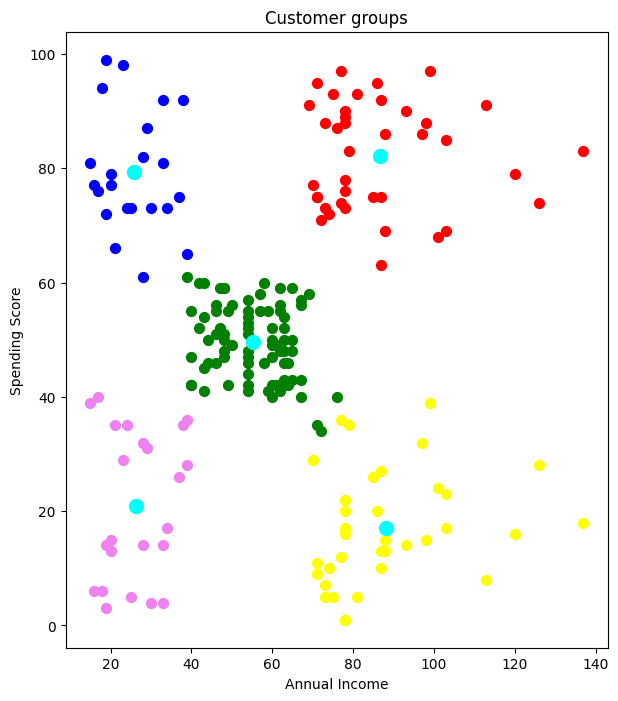

In [22]:
plt.figure(figsize=(7, 8))

plt.scatter(X[y == 0, 0], X[y == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X[y == 3, 0], X[y == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(X[y == 4, 0], X[y == 4, 1], s=50, c='blue', label='Cluster 5')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()